In [1]:
from models import MeshModel
import jax
from jax.typing import ArrayLike
from models.spots import v_spot
from models import MeshModel, IcosphereModel
import jax.numpy as jnp
from jax.typing import ArrayLike
from models.mesh_transform import add_rotation, evaluate_rotation
from plots import plot_3D, plot_2D
from spectrum import simulate_spectrum, blackbody_intensity
from functools import partial
from models.spots import add_spots

m = IcosphereModel.construct(1000, 1., 1., 1., jnp.concatenate([jnp.array([jnp.log10(7000)]), jnp.ones(19)]))  #__overabundance_spot_params(theta, phi, abun, abun_bg, radius, radius_factor, coord)

In [2]:
s = add_spots(m, jnp.array([0., 1.]),
              jnp.array([0., .5]), jnp.array([0.1, 0.5]),
              jnp.array([1., 0.5]), jnp.array([1., 0.9]), jnp.array([0, 0]))

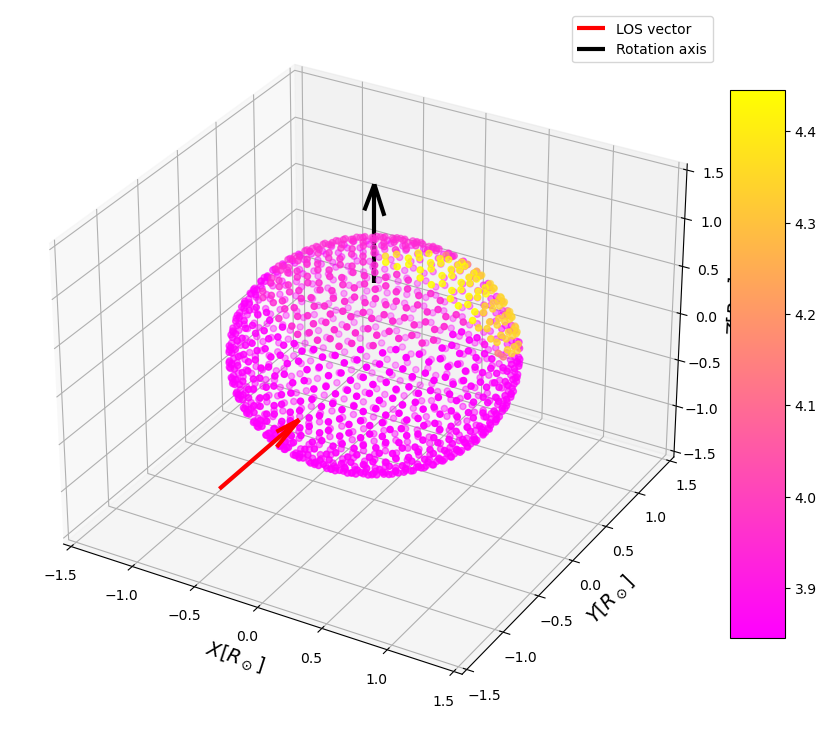

In [3]:
plot_3D(s, 0, cmap='spring')

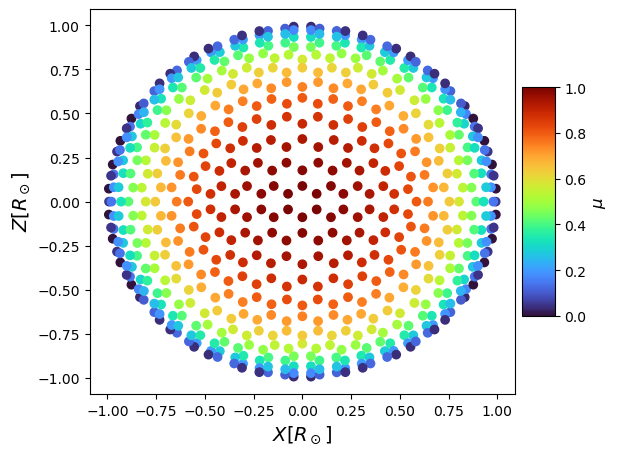

In [4]:
plot_2D(s, 'mus', x_index=0, y_index=2)

In [5]:
import astropy.units as u
import numpy as np

In [6]:
bi = blackbody_intensity(jnp.log10(jnp.linspace(1000., 15000., 100)), 0., [np.log10(7000)])
i = simulate_spectrum(blackbody_intensity, m, jnp.log10(jnp.linspace(1000., 15000., 100)))

In [7]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'Wavelength [$\\AA$]')

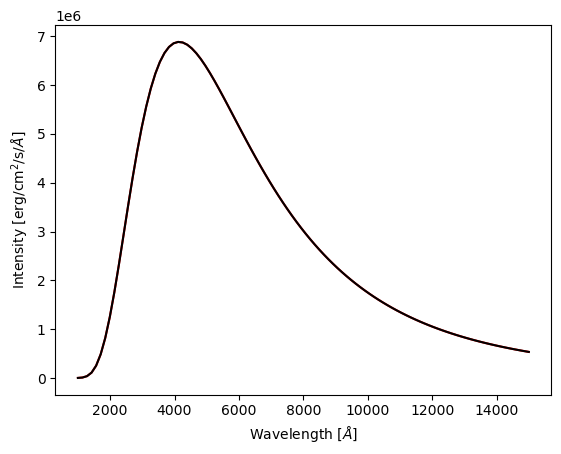

In [8]:
plt.plot(jnp.linspace(1000., 15000., 100), bi[0], color='red');
plt.plot(jnp.linspace(1000., 15000., 100), i[:, 1], color='black');
plt.gca().set_ylabel('Intensity [erg/cm$^2$/s/$\AA$]')
plt.gca().set_xlabel('Wavelength [$\AA$]')

In [9]:
si = simulate_spectrum(blackbody_intensity, s, jnp.log10(jnp.linspace(1000., 15000., 100)))

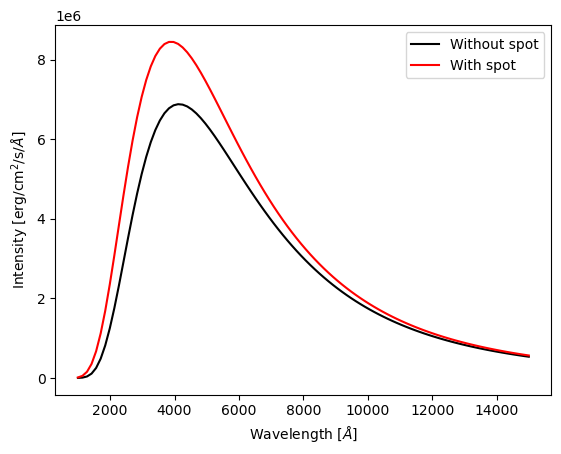

In [10]:
plt.plot(jnp.linspace(1000., 15000., 100), i[:, 1], color='black', label='Without spot');
plt.plot(jnp.linspace(1000., 15000., 100), si[:, 1], color='red', label='With spot');

plt.gca().set_ylabel('Intensity [erg/cm$^2$/s/$\AA$]')
plt.gca().set_xlabel('Wavelength [$\AA$]')
plt.legend();